## Heart Disease Diagnosis 

### About this dataset

#### This dataset contains records related to the diagnosis of heart disease in patients. It includes various clinical and non-clinical attributes used to determine the presence or absence of heart disease. The data was collected from Kaggle, and it consists of 918 entries with 12 features. Columns cover aspects like patient demographics, vital signs, symptoms, and potential risk factors associated with heart conditions. Prior to analysis, preprocessing steps. This dataset can be utilized for exploratory data analysis, predictive modeling, and uncovering patterns contributing to heart disease diagnosis.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\Unified Mentor\Projects\Heart Disease Diagnosis\heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.shape

(918, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [24]:
print("Number of duplicates: " + str(df.duplicated().sum()))

Number of duplicates: 0


In [26]:
#0= less chance of heart disease

#1= more chance of heart disease

df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

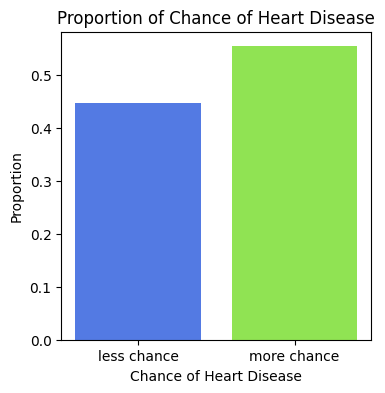

In [27]:
output_counts = df["HeartDisease"].value_counts(normalize=True)
plt.figure(figsize=(4,4))
plt.bar(x=output_counts.index, height=output_counts.values, color=["#90E353", "#537AE3"])
plt.xticks([0, 1], ["less chance", "more chance"])
plt.title("Proportion of Chance of Heart Disease")
plt.xlabel("Chance of Heart Disease")
plt.ylabel("Proportion")
plt.show()

In [10]:
pain = df['ChestPainType']
cholesterol = df['Cholesterol']
sex = df['Sex']

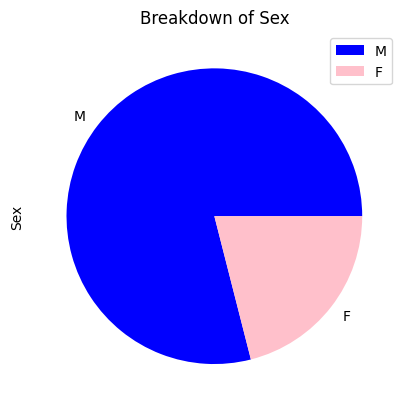

In [11]:
sex.value_counts().plot(kind='pie', colors =['blue','pink'])
plt.title("Breakdown of Sex")
plt.legend(['M','F'])
plt.show()

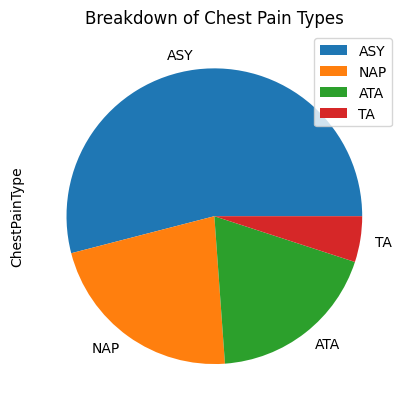

In [12]:
pain.value_counts().plot(kind='pie')
plt.title("Breakdown of Chest Pain Types")
plt.legend(['ASY','NAP', 'ATA', 'TA'])
plt.show()

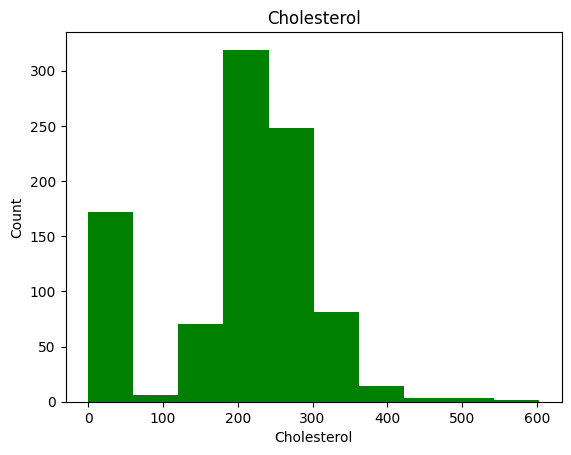

In [13]:
plt.hist(cholesterol, color='green')
plt.title('Cholesterol')
plt.xlabel("Cholesterol")
plt.ylabel("Count")
plt.show()

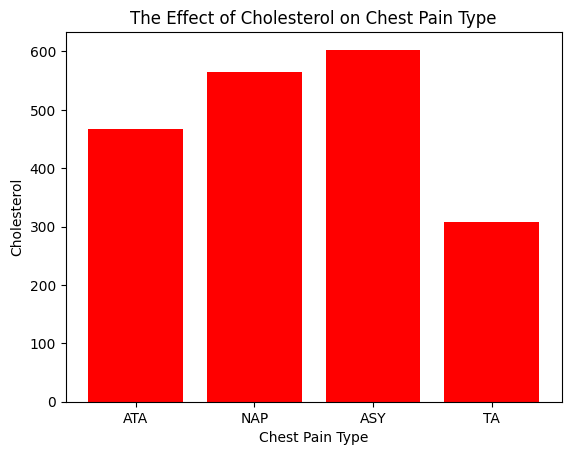

In [14]:
plt.bar(pain, cholesterol, color='red')
plt.title('The Effect of Cholesterol on Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel("Cholesterol")
plt.show()

In [15]:
just_F = df[df['Sex']== 'F']
just_M = df[df['Sex']== 'M']

In [16]:
F_pain = just_F['ChestPainType']
M_pain = just_M['ChestPainType']

In [17]:
F_cholesterol = just_F['Cholesterol']
M_cholesterol = just_M['Cholesterol']

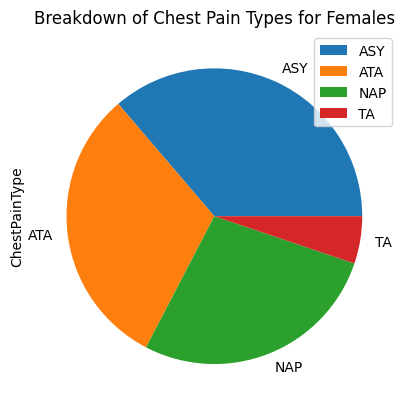

In [18]:
F_pain.value_counts().plot(kind='pie')
plt.title("Breakdown of Chest Pain Types for Females")
plt.legend(['ASY','ATA', 'NAP', 'TA'])
plt.show()

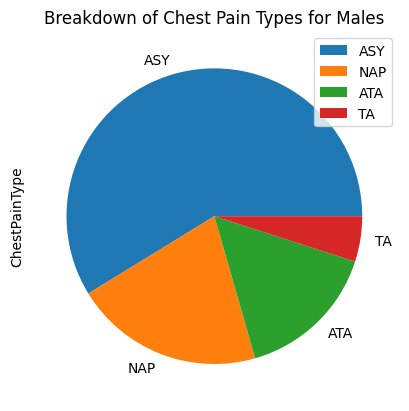

In [19]:
M_pain.value_counts().plot(kind='pie')
plt.title("Breakdown of Chest Pain Types for Males")
plt.legend(['ASY','NAP', 'ATA', 'TA'])
plt.show()

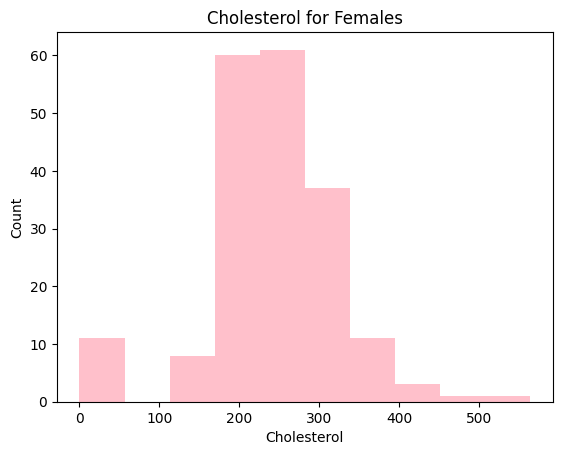

In [20]:

plt.hist(F_cholesterol, color='pink')
plt.title('Cholesterol for Females')
plt.xlabel("Cholesterol")
plt.ylabel("Count")
plt.show()

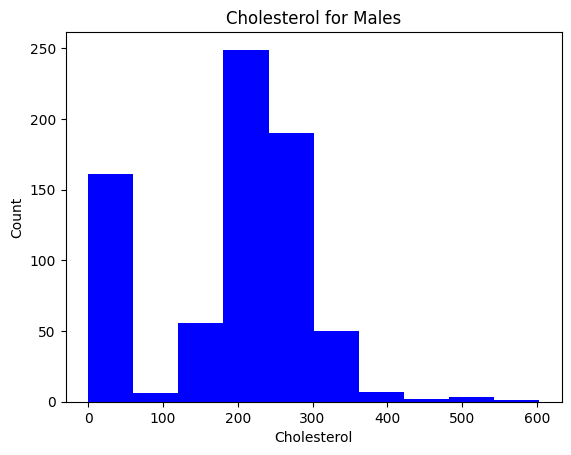

In [21]:
plt.hist(M_cholesterol, color='blue')
plt.title('Cholesterol for Males')
plt.xlabel("Cholesterol")
plt.ylabel("Count")
plt.show()

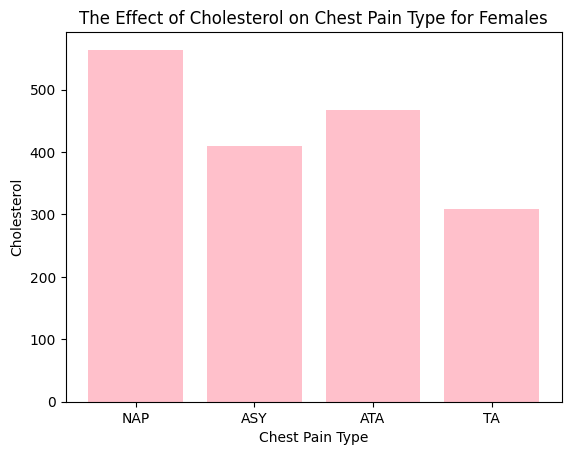

In [22]:
plt.bar(F_pain, F_cholesterol, color='pink')
plt.title('The Effect of Cholesterol on Chest Pain Type for Females')
plt.xlabel('Chest Pain Type')
plt.ylabel("Cholesterol")
plt.show()

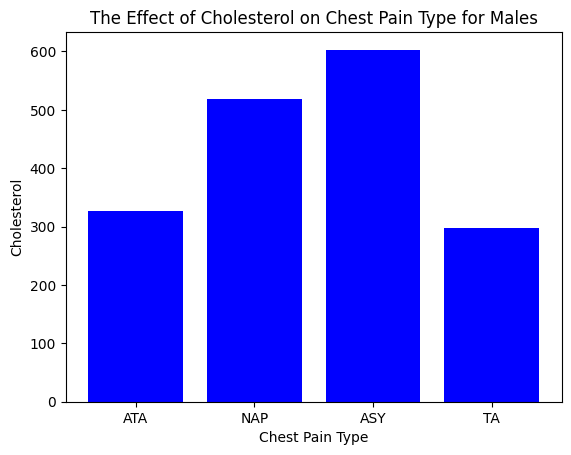

In [23]:
plt.bar(M_pain, M_cholesterol, color='blue')
plt.title('The Effect of Cholesterol on Chest Pain Type for Males')
plt.xlabel('Chest Pain Type')
plt.ylabel("Cholesterol")
plt.show()

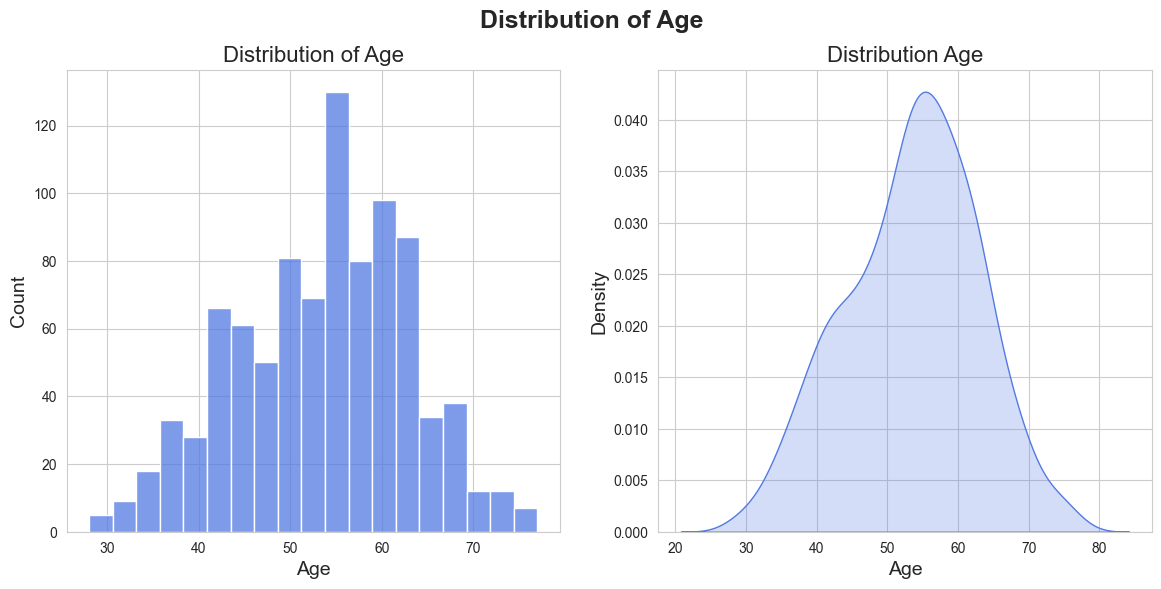

In [28]:
sns.set_style('whitegrid')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,6))
sns.histplot(data=df, x='Age', kde=False, ax=ax1, color='#537AE3')
ax1.set_xlabel('Age', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)
ax1.set_title('Distribution of Age', fontsize=16)
sns.kdeplot(data=df, x='Age', fill=True, ax=ax2, color='#537AE3')
ax2.set_xlabel('Age', fontsize=14)
ax2.set_ylabel('Density', fontsize=14)
ax2.set_title('Distribution Age', fontsize=16)
fig.suptitle('Distribution of Age', fontsize=18, fontweight='bold')
plt.show()

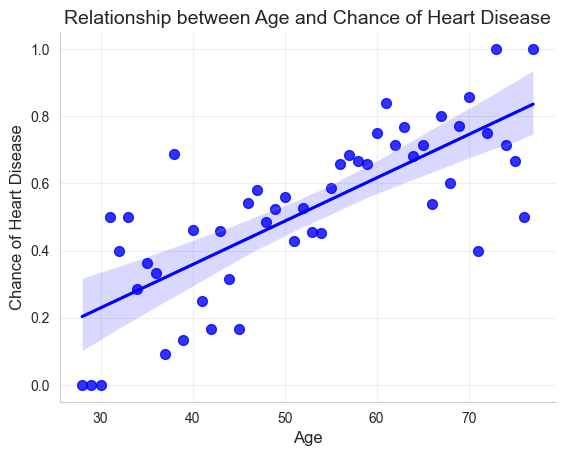

In [29]:
age_grouped = df.groupby('Age')['HeartDisease'].mean()
sns.regplot(x=age_grouped.index, y=age_grouped, color='blue', scatter_kws={'s': 50})
sns.despine()
plt.xlabel('Age', fontsize=12)
plt.ylabel('Chance of Heart Disease', fontsize=12)
plt.title('Relationship between Age and Chance of Heart Disease', fontsize=14)
plt.grid(axis='both', alpha=0.3)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Comment: Positive Correlation

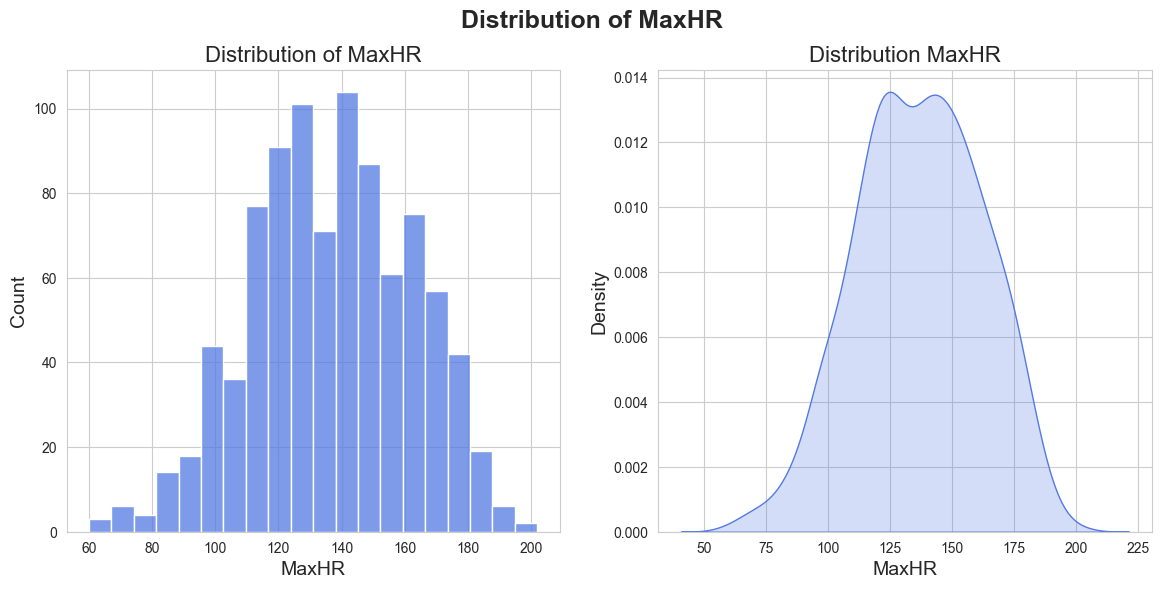

In [30]:
# Distribution of MaxHR

sns.set_style('whitegrid')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,6))
sns.histplot(data=df, x='MaxHR', kde=False, ax=ax1, color='#537AE3')
ax1.set_xlabel('MaxHR', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)
ax1.set_title('Distribution of MaxHR', fontsize=16)
sns.kdeplot(data=df, x='MaxHR', fill=True, ax=ax2, color='#537AE3')
ax2.set_xlabel('MaxHR', fontsize=14)
ax2.set_ylabel('Density', fontsize=14)
ax2.set_title('Distribution MaxHR', fontsize=16)
fig.suptitle('Distribution of MaxHR', fontsize=18, fontweight='bold')
plt.show()

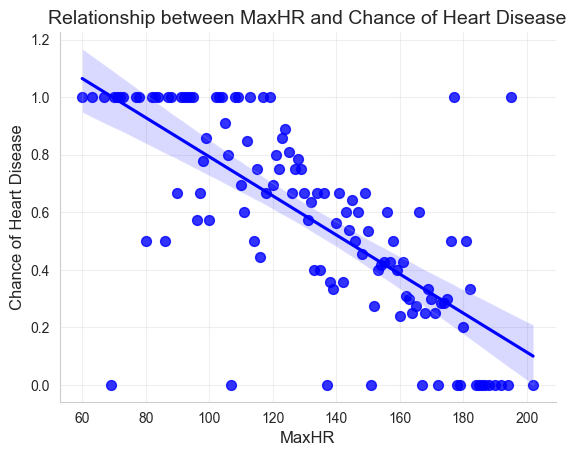

In [31]:
# Relationship between MaxHR and Chance of Heart Disease

age_grouped = df.groupby('MaxHR')['HeartDisease'].mean()
sns.regplot(x=age_grouped.index, y=age_grouped, color='blue', scatter_kws={'s': 50})
sns.despine()
plt.xlabel('MaxHR', fontsize=12)
plt.ylabel('Chance of Heart Disease', fontsize=12)
plt.title('Relationship between MaxHR and Chance of Heart Disease', fontsize=14)
plt.grid(axis='both', alpha=0.3)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

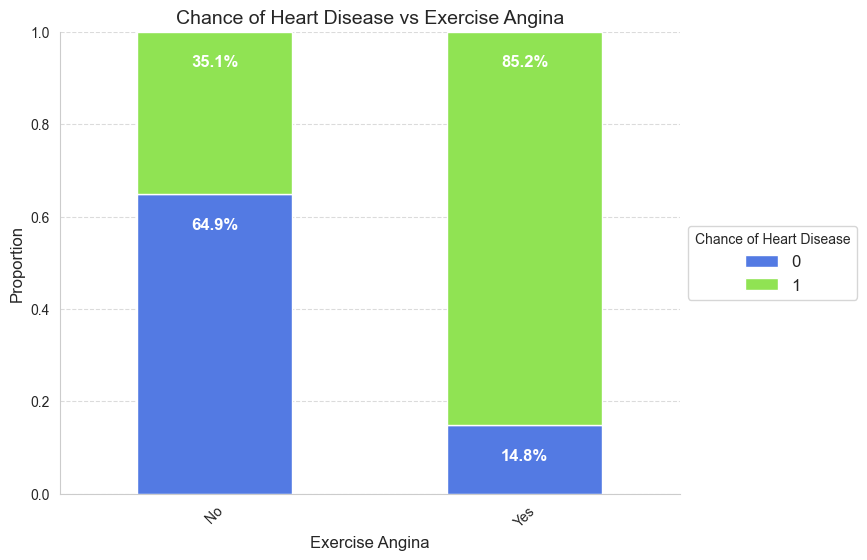

In [32]:
colors = ["#537AE3", "#90E353"]
cross_tab = pd.crosstab(df['ExerciseAngina'], df['HeartDisease'], normalize='index')
ax = cross_tab.plot(kind='bar', stacked=True, color=colors, figsize=(8,6))
ax.set_xlabel('Exercise Angina', fontsize=12)
ax.set_ylabel('Proportion', fontsize=12)
ax.set_title('Chance of Heart Disease vs Exercise Angina', fontsize=14)
ax.legend(title='Chance of Heart Disease', loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)
plt.xticks(rotation=45)
plt.xticks([0, 1], ["No", "Yes"])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_ylim(0, 1)
for i in range(len(cross_tab)):
    for j in range(len(cross_tab.columns)):
        plt.text(i, cross_tab.iloc[i, :j+1].sum() - 0.05, str(round(cross_tab.iloc[i, j]*100,1)) + '%', ha='center', va='top', fontsize=12, fontweight='bold', color='white')
plt.show()

## Comment: Yes - More Chance of Heart Disease

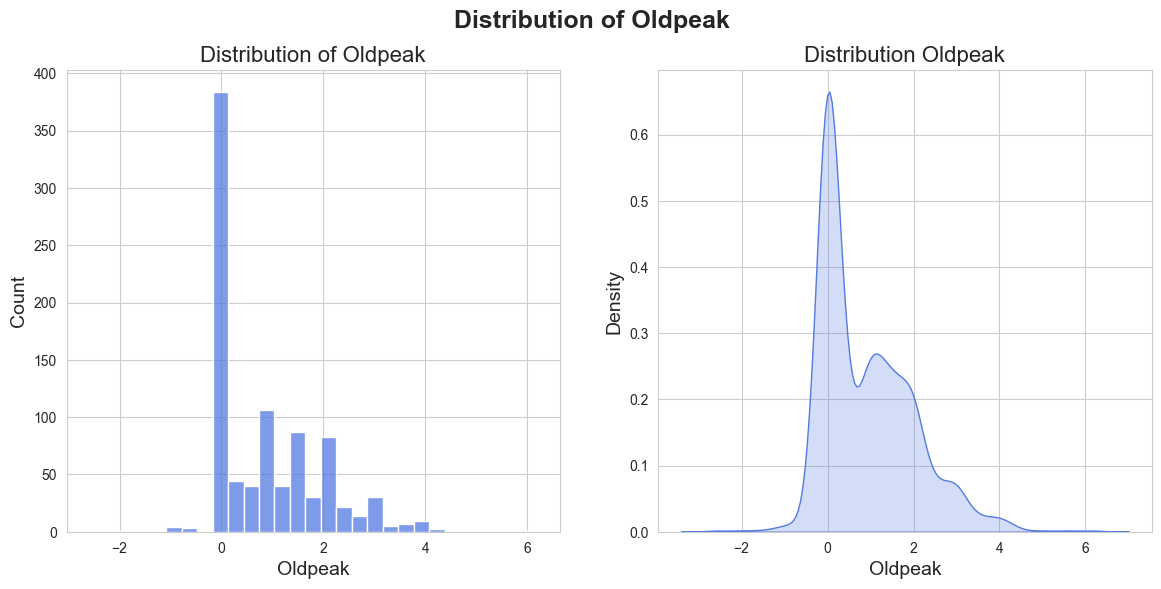

In [33]:
# Distribution of Oldpeak

sns.set_style('whitegrid')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,6))
sns.histplot(data=df, x='Oldpeak', kde=False, ax=ax1, color='#537AE3')
ax1.set_xlabel('Oldpeak', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)
ax1.set_title('Distribution of Oldpeak', fontsize=16)
sns.kdeplot(data=df, x='Oldpeak', fill=True, ax=ax2, color='#537AE3')
ax2.set_xlabel('Oldpeak', fontsize=14)
ax2.set_ylabel('Density', fontsize=14)
ax2.set_title('Distribution Oldpeak', fontsize=16)
fig.suptitle('Distribution of Oldpeak', fontsize=18, fontweight='bold')
plt.show()

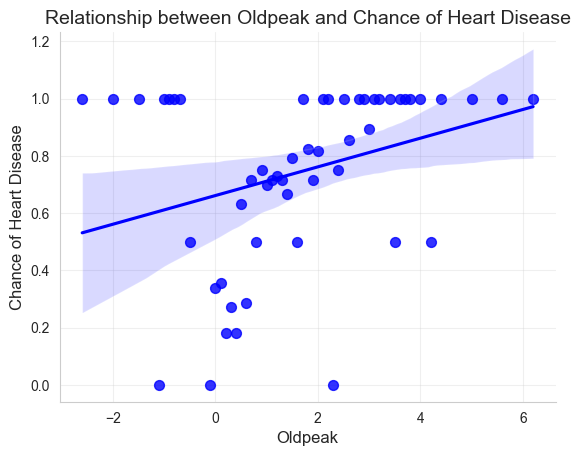

In [34]:
# Relationship between Oldpeak and Chance of Heart Disease

age_grouped = df.groupby('Oldpeak')['HeartDisease'].mean()
sns.regplot(x=age_grouped.index, y=age_grouped, color='blue', scatter_kws={'s': 50})
sns.despine()
plt.xlabel('Oldpeak', fontsize=12)
plt.ylabel('Chance of Heart Disease', fontsize=12)
plt.title('Relationship between Oldpeak and Chance of Heart Disease', fontsize=14)
plt.grid(axis='both', alpha=0.3)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25716\4144444954.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = df.corr()["HeartDisease"].sort_values(ascending=False)


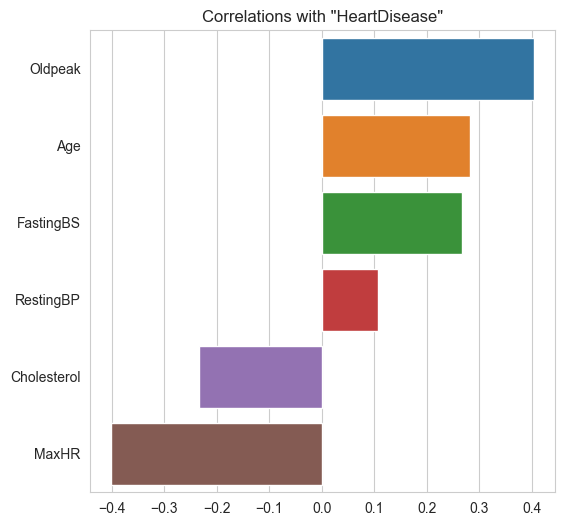

In [35]:
limit = -1.0

data = df.corr()["HeartDisease"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    if data[indices[i]]>limit:
        labels.append(indices[i])
        corr.append(data[i])
fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(x=corr, y=labels, ax=ax)
plt.title('Correlations with "HeartDisease"')
plt.show()